# Introduction

This notebook is not about training on  your own data. However, this notebook introduces how to use YOLOv2 on your data. It shows the process of taking input from your data (image), then outputing the pre-defined labels for the localized object on the image. After completing this notebook, I will go over how the training process can be done in the separate notebook. Here is the Link __[Train Soccer Ball Detection using YOLOv2](https://github.com/deep-diver/Soccer-Ball-Detection-YOLOv2)__

It is really your choice which implementation to use. I happened to choose [darkflow](https://github.com/thtrieu/darkflow) which has been quite popular for Tensorflow support on Github open source hosting service. However, you can build the YOLO model on your own since the [official web-site](https://pjreddie.com/darknet/yolo/) provides its pre-trained weights as an external file.

Here is another choice of implementation called, [tensornets](https://github.com/taehoonlee/tensornets). Please check it out.  

# Installing Darkflow

You can find the instruction from the official darkflow repo, but I will leave it here for convenience.

__1. install Cython__
   - pip install Cython
   
__2. clone/download the darkflow__
   - git clone https://github.com/thtrieu/darkflow.git
   
__3. install the darkflow__
   - python3 setup.py build_ext --inplace
   
__4. Install with pip globally (don't forget the last '.' dot)__
   - pip install .

# Download Weights Files

Please visit here (https://drive.google.com/drive/folders/0B1tW_VtY7onidEwyQ2FtQVplWEU) to download weights files, and place them to the 'bin' folder. If you don't have it, just create 'bin' folder. You don't have to download all weights file. Please download some of them that you are interested in. Below shows what I have downloaded for this project.

<img src='./weights.PNG'/>

# Importing Dependencies

Before importing YOLO model, we need OpenCV and Numpy libarary. Since OpenCV is very popular image processing libarary, and I am a little familiar with it, I am going to use it. OpenCV helps loading images as a numpy array(matrix) form like Width x Height x Channel. It also makes easier to draw rectangle boxes and its text label for detected object on the image. As OpenCV returns the image as a numpy array form, Numpy library can be useful. Specifically, I am going to use it to make an copy of the image so that the original image can be preserved.

As the [document](https://github.com/thtrieu/darkflow) says, I need to import TFNet for YOLO from darkflow package. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Options

There are several options to specify before running YOLO. 
- __model__: it specifies which model to use.
  - YOLO, YOLO-VOC, TINY-YOLO, TINY-YOLO-VOC, TINY-YOLO-4C are the available choices.
  
- __load__: it specifies where the pre-trained weights are. You can use your own weights after training on your own dataset. That is the other purpose.
  - I downloaded the [weight file](https://drive.google.com/drive/folders/0B1tW_VtY7onidEwyQ2FtQVplWEU) provided by the author of the darkflow

- __threshold__: it specifies the threshold for the confidence value of the predicted object. If you increase the value, the model will return fewer objects as result.

- __gpu__: it specifies whether you want to use GPU. If not specified, the model will be run soley on CPU.

In [2]:
options = {"model": "cfg/yolo.cfg", "load": "bin/yolo.weights", "threshold": 0.1, "gpu": 1.0}

# Build the model

This process is related to defining the model and loading the pre-trained parameters(weights) according to the previously specified in the option. While the building process, you can see it loading the weights into the model. After building process is done, it will display the shape of the model (what layers consist of the model)

You only need to create TFNet instance with the pre-defined options.

In [3]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.01375126838684082s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

# Let's see what it returns

The function, return_predict(), in TFNet returns a list of detected object when a numpy format image is provided. The numpy image can easily be loaded by cv2.imread function. An item in the resulting list has 4 information.
- __topleft__: x and y coordinate of the top-left corner
- __bottomright__: x and y coordinate of the bottom-right corner
- __confidence__: how confident is TFNet about the detection result? range of 0 ~ 1.0 value
- __label__: description of the object


In [5]:
import pprint as pp

original_img = cv2.imread("./sample_img/sample_multiple_objects.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)

pp.pprint(results)

[{'bottomright': {'x': 157, 'y': 208},
  'confidence': 0.6707978,
  'label': 'person',
  'topleft': {'x': 61, 'y': 3}},
 {'bottomright': {'x': 286, 'y': 258},
  'confidence': 0.32715693,
  'label': 'person',
  'topleft': {'x': 200, 'y': 38}},
 {'bottomright': {'x': 329, 'y': 187},
  'confidence': 0.2517709,
  'label': 'person',
  'topleft': {'x': 317, 'y': 156}},
 {'bottomright': {'x': 371, 'y': 204},
  'confidence': 0.14781977,
  'label': 'person',
  'topleft': {'x': 354, 'y': 183}},
 {'bottomright': {'x': 524, 'y': 373},
  'confidence': 0.7331764,
  'label': 'person',
  'topleft': {'x': 443, 'y': 139}},
 {'bottomright': {'x': 592, 'y': 378},
  'confidence': 0.22580808,
  'label': 'person',
  'topleft': {'x': 561, 'y': 147}},
 {'bottomright': {'x': 594, 'y': 430},
  'confidence': 0.76619285,
  'label': 'person',
  'topleft': {'x': 501, 'y': 135}},
 {'bottomright': {'x': 596, 'y': 430},
  'confidence': 0.14075167,
  'label': 'person',
  'topleft': {'x': 567, 'y': 363}},
 {'bottomright'

# Display before boxing

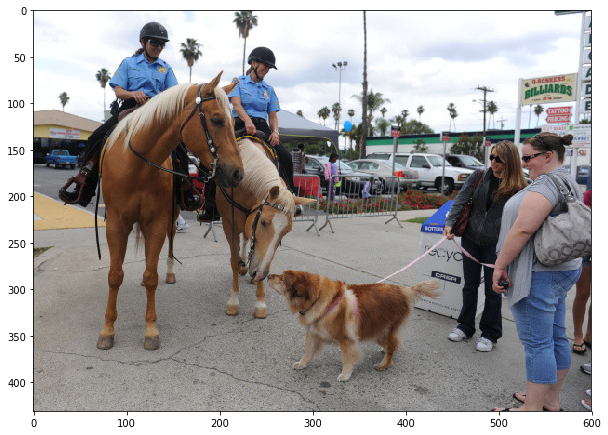

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

# Boxing function
I define boxing() function to draw boxes, labels, and confidence value around the detected objects on the image. I initially set the threshold to 0.1 so that I can let TFNet detects as many object as possible and decide to restrict the number of resulting object later. I set the filter value for the threshold (confidence) to 0.3 here.

In [26]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

# Boxing results

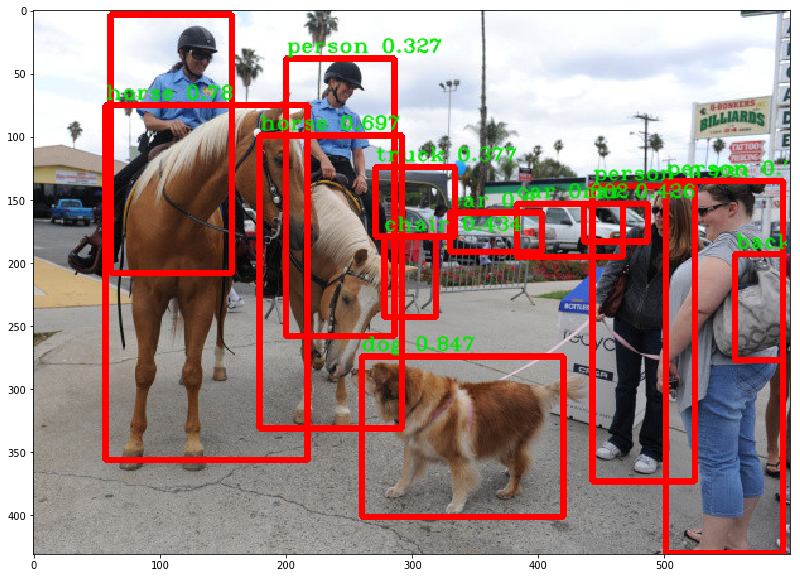

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

# Boxing on video 

please check supported video output format [here](https://docs.opencv.org/3.1.0/dd/d43/tutorial_py_video_display.html) depending on your operating system. In my case, I have tested on Windows 10. 

In [44]:
cap = cv2.VideoCapture('./sample_video/test_video.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('./sample_video/output.avi',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)
        results = tfnet.return_predict(frame)

        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()